# Câu hỏi: Xu hướng về sự đa dạng hóa nội dung quốc tế và nội dung nội địa của Netflix là gì?

**Lợi ích:**
   - Giúp phân tích sự thay đổi trong chiến lược nội dung quốc tế của Netflix, bao gồm sự gia tăng nội dung từ các quốc gia khác ngoài Mỹ.
   - Điều này giúp nhận diện các xu hướng toàn cầu và nhận xét về việc Netflix đang mở rộng ra thị trường quốc tế như thế nào.

**Cách làm:**
   - Phân tích tỷ lệ nội dung quốc tế và nội dung từ Mỹ qua các năm.
   - Xác định các quốc gia có sự gia tăng đáng kể về sản lượng nội dung trên Netflix (country).
   - Vẽ biểu đồ phân chia tỷ lệ nội dung quốc tế và nội dung nội địa theo từng năm.

### Các thư viện cần thiết:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Đọc file vào dataframe:

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('../data/netflix_titles_cleaned.csv', encoding='ISO-8859-1', skiprows= 0)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,season,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,UNKNOWN,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",NaN,90.0
1,TV Show,Blood & Water,UNKNOWN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,NaN
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UNKNOWN,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,NaN
3,TV Show,Jailbirds New Orleans,UNKNOWN,UNKNOWN,UNKNOWN,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,NaN
4,TV Show,Kota Factory,UNKNOWN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,NaN


## A. Tiền xử lý:

Bỏ những cột không cần thiết:

In [3]:
df = df.drop(columns = ['cast', 'rating', 'listed_in', 'description', 'season', 'duration'])

Theo quan sát dữ liệu, vẫn còn tồn tại 2 dòng có xuất hiện dấu ',' đầu dòng. Tiến hành chuẩn hoá chuỗi.

In [4]:
index = df[df['country'].isin([', South Korea', ', France, Algeria'])].sort_index()
country = index['country'].str.strip(', ')
index['country'] = country
df[df['country'].isin([', South Korea', ', France, Algeria'])] = index.copy()
df.loc[index.index, 'country']

193        South Korea
365    France, Algeria
Name: country, dtype: object

- Chuẩn hoá thành công.

One-Hot encoding cho cột `country` để phân tích quốc gia.

In [8]:
# Loại bỏ dấu phẩy thừa và khoảng trắng ở đầu/cuối
df['country'] = df['country'].str.replace(r',\s*$', '', regex=True)

# Chuyển đổi cột 'country' thành các giá trị one-hot encoding
listed_in_encoded = df['country'].str.split(', ', expand=True).stack()

# Tạo one-hot encoding cho các quốc gia
listed_in_encoded = pd.get_dummies(listed_in_encoded)
listed_in_encoded = listed_in_encoded.drop(columns='UNKNOWN')

# Gộp lại với DataFrame ban đầu
df = pd.concat([df, listed_in_encoded.groupby(level=0).sum()], axis=1)

# Xóa cột 'country' nếu không còn cần thiết
df = df.drop(columns='country')

# Kiểm tra kết quả
df.head()


,type,title,director,date_added,release_year,Afghanistan,Albania,Algeria,Angola,Argentina,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,TV Show,Blood & Water,UNKNOWN,2021-09-24,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TV Show,Ganglands,Julien Leclercq,2021-09-24,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,TV Show,Jailbirds New Orleans,UNKNOWN,2021-09-24,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,TV Show,Kota Factory,UNKNOWN,2021-09-24,2021,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## B. Phân tích:

### 1. Sự thay đổi về số lượng nội dung nội địa và quốc tế được thêm vào Netflix qua các năm:

##### 1.1. Tổng số lượng nội dung nội địa và quốc tế được thêm vào Netflix:

- Các bước thực hiện:
    - Bước 1: Tạo cột 'is_international' dựa trên one-hot encoding.
    - Bước 2: Phân tích tỷ lệ nội dung quốc tế và nội địa theo từng năm.
    - Bước 3: Vẽ biểu đồ phân chia tỷ lệ nội dung quốc tế và nội địa theo năm

In [18]:
# Kiểm tra từng dòng trong DataFrame để gán giá trị vào 'is_international'
df['is_international'] = df.apply(
    lambda row: 'Nội địa (Hoa Kỳ)' if row['United States'] == 1 else
               ('Quốc tế' if row[list(listed_in_encoded.columns)].sum() > 0 else 'Không xác định'),
    axis=1
)

# Chuyển 'date_added' thành kiểu datetime và thêm cột 'release_year'
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = df['date_added'].dt.year

# Đếm số lượng nội dung quốc tế và nội địa theo từng năm
content_distribution_by_year = df.groupby(['release_year', 'is_international']).size().unstack().fillna(0)
# Vì chưa tổng kết năm 2024 nên ta tạm bỏ qua trong phần tính số lượng này
content_distribution_by_year = content_distribution_by_year.drop(2024)
print (content_distribution_by_year)

is_international  Không xác định  Nội địa (Hoa Kỳ)  Quốc tế
release_year                                               
2008                         0.0               2.0      0.0
2009                         0.0               1.0      1.0
2010                         0.0               1.0      0.0
2011                         0.0              12.0      1.0
2012                         0.0               3.0      0.0
2013                         0.0              10.0      1.0
2014                         0.0              22.0      2.0
2015                         3.0              57.0     22.0
2016                        19.0             203.0    207.0
2017                        65.0             462.0    661.0
2018                       119.0             599.0    930.0
2019                       157.0             856.0   1001.0
2020                       108.0             828.0    943.0
2021                       358.0             627.0    513.0


- Biểu đồ: linechart.
- Lý do chọn biểu đồ: Biểu đồ đường giúp trực quan tốt xu hướng qua từng năm dựa vào độ lên xuống của biểu đồ. Thông qua đó có thể dễ dàng quan sát được sự thay đổi qua từng năm.

<Figure size 1000x600 with 0 Axes>

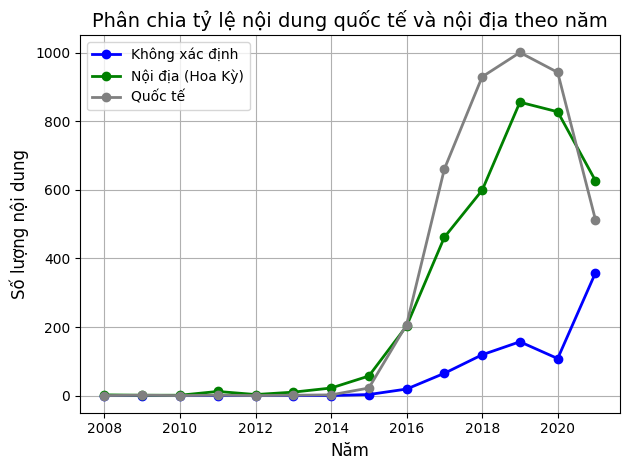

In [19]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
content_distribution_by_year.plot(kind='line', marker='o', color=['blue', 'green', 'gray'], linewidth=2)

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân chia tỷ lệ nội dung quốc tế và nội địa theo năm', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Số lượng nội dung', fontsize=12)
plt.legend(['Không xác định', 'Nội địa (Hoa Kỳ)', 'Quốc tế'], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
